Assignment 3 :IBM-14760-1659589673

Problem Statement: Abalone Age Prediction

Description :

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Importing Modules

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

1. Dataset has been downloaded

In [ ]:
#Name of the dataset: abalone.csv

2. Load the dataset into the tool

In [ ]:
data=pd.read_csv("abalone.csv")
data.head()

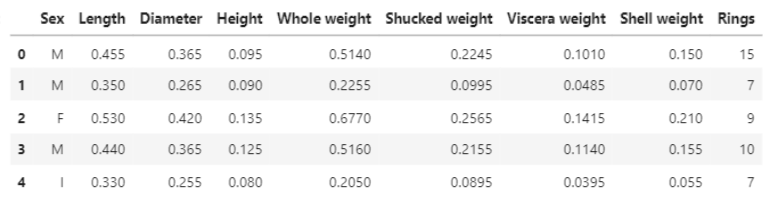

Let's know the shape of the data

In [ ]:
data.shape

One additional task is that, we have to add the "Age" column using "Rings" data. We just have to add '1.5' to the ring data

In [ ]:
Age=1.5+data.Rings
data["Age"]=Age
data=data.rename(columns = {'Whole weight':'Whole_weight','Shucked weight': 'Shucked_weight','Viscera weight': 'Viscera_weight',
                            'Shell weight': 'Shell_weight'})
data=data.drop(columns=["Rings"],axis=1)
data.head()

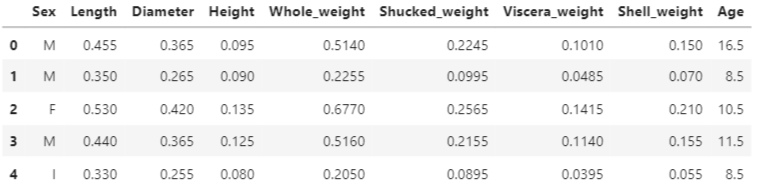

3. Perform Below Visualizations.

(i) Univariate Analysis

#

The term univariate analysis refers to the analysis of one variable. You can remember this because the prefix “uni” means “one.” There are three common ways to perform univariate analysis on one variable: 1. Summary statistics – Measures the center and spread of values.

#

Histogram

In [ ]:
sns.displot(data["Age"], color='darkorange')

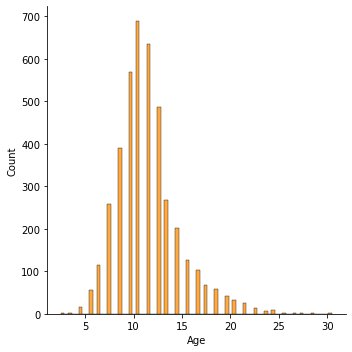

In [ ]:
sns.histplot(y=data.Age,color='pink') 

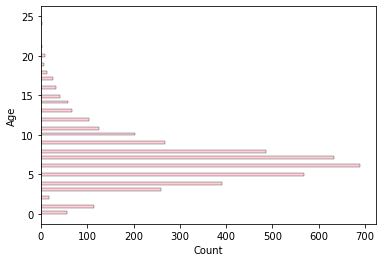

In [ ]:
sns.histplot(x=data.Age,color='green')

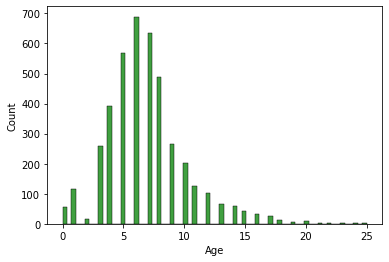

Boxplot

In [ ]:
sns.boxplot(x=data.Age,color='pink') 

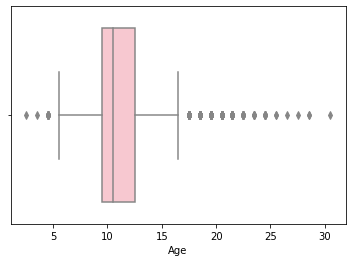

Countplot

In [ ]:
sns.countplot(x=data.Age) 

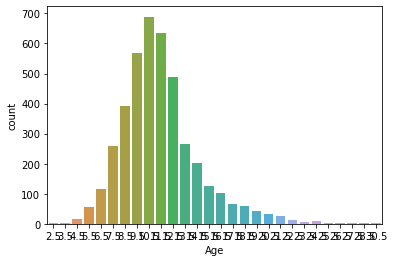

(ii) Bi-Variate Analysis

#

Image result for bivariate analysis in python It is a methodical statistical technique applied to a pair of variables (features/ attributes) of data to determine the empirical relationship between them. In order words, it is meant to determine any concurrent relations (usually over and above a simple correlation analysis).

#

Barplot

In [ ]:
sns.barplot(x=data.Height,y=data.Age)

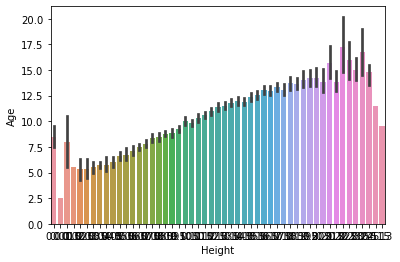

Linearplot

In [ ]:
sns.lineplot(x=data.Age,y=data.Height, color='purple')

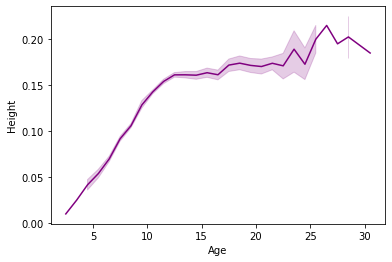

Scatterplot

In [ ]:
sns.scatterplot(x=data.Age,y=data.Height,color='green')

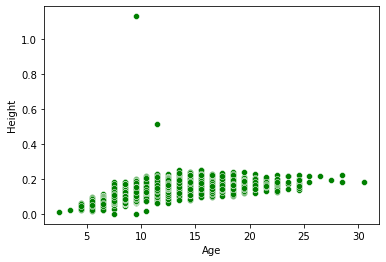

Pointplot

In [ ]:
sns.pointplot(x=data.Age, y=data.Height, color="blue") 

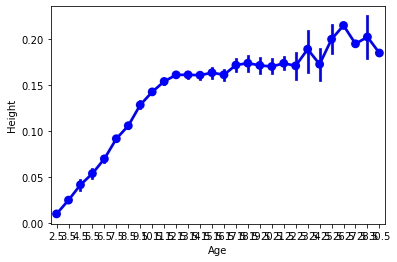

Regplot

In [ ]:
sns.regplot(x=data.Age,y=data.Height,color='orange') 

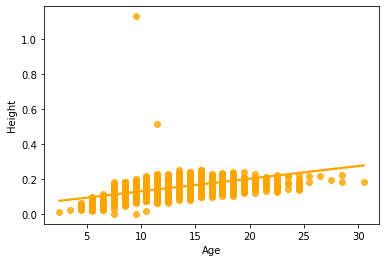

(iii) Multi-Variate Analysis

#

Multivariate analysis is based in observation and analysis of more than one statistical outcome variable at a time. In design and analysis, the technique is used to perform trade studies across multiple dimensions while taking into account the effects of all variables on the responses of interest.

#

Pairplot

In [ ]:
sns.pairplot(data=data[["Height","Length","Diameter","Age","Whole_weight","Shucked_weight","Viscera_weigh

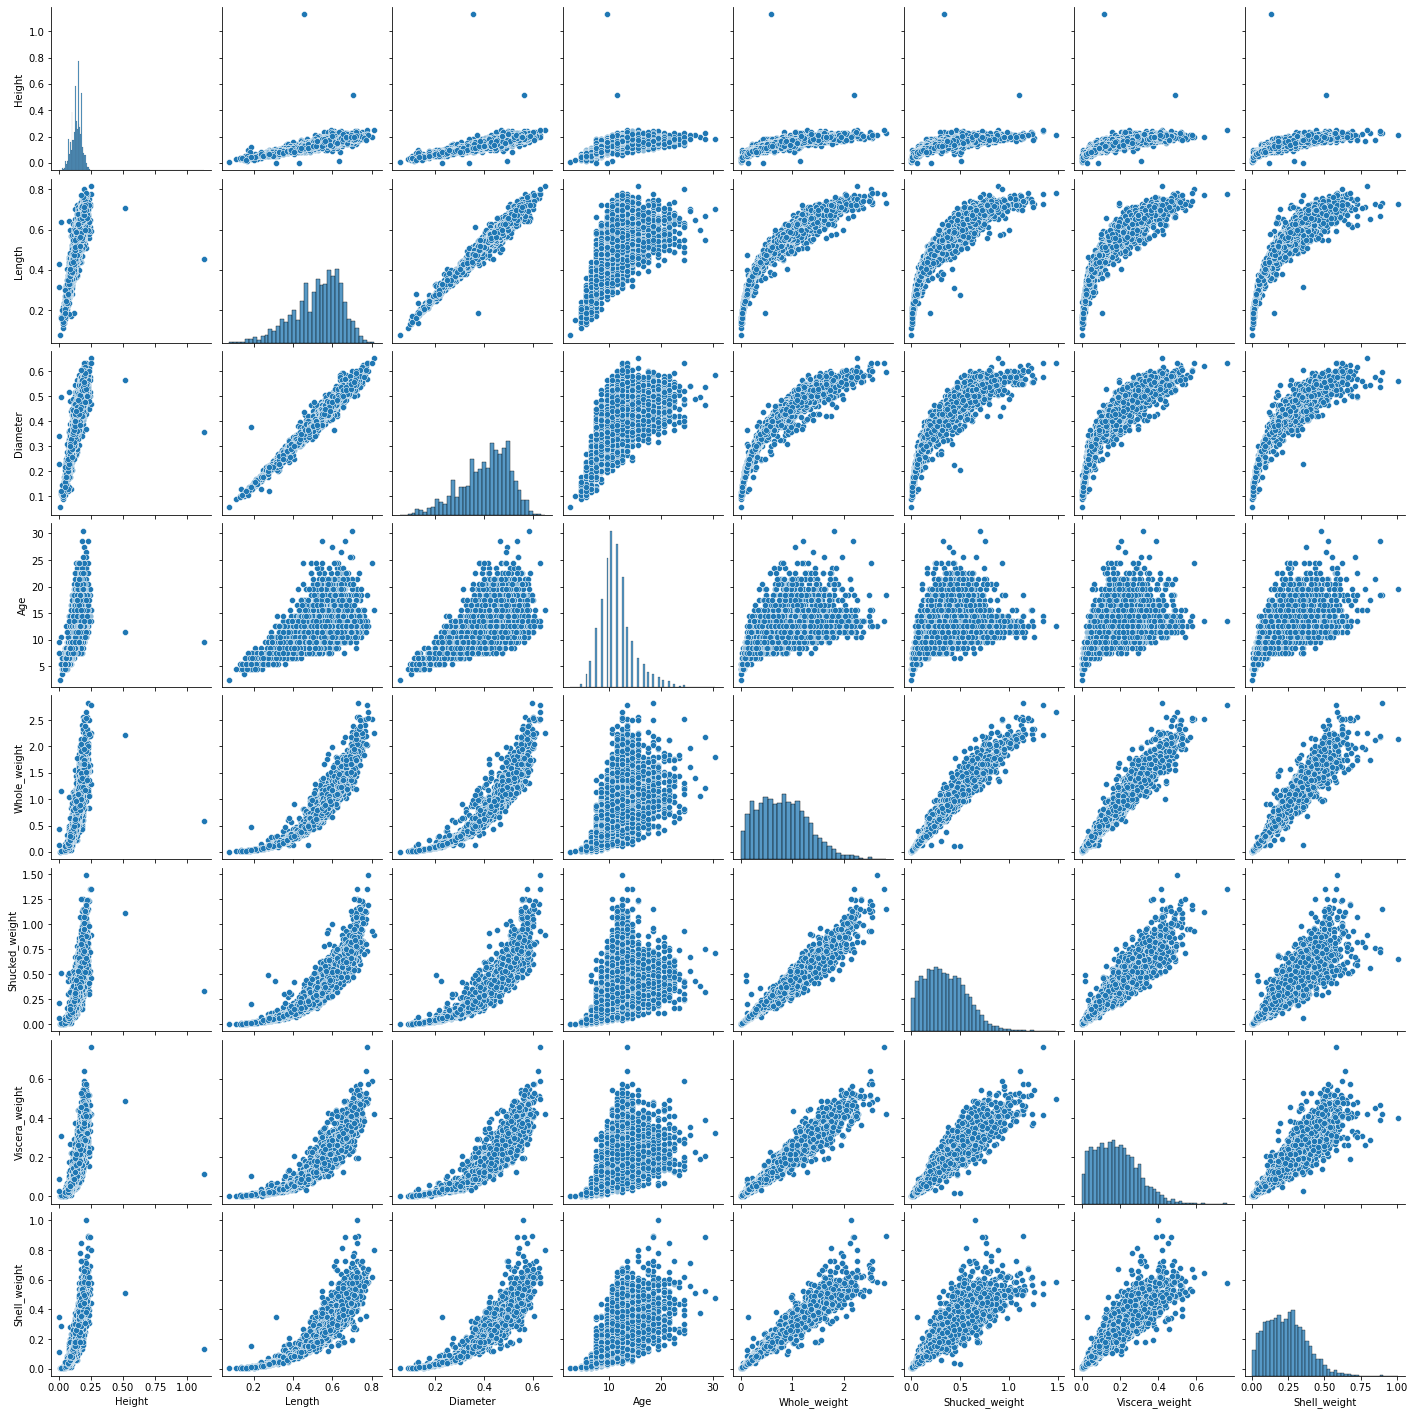

In [ ]:
sns.pairplot(data=data[["Height","Length","Diameter","Age","Whole_weight","Shucked_weight","Viscera_weight

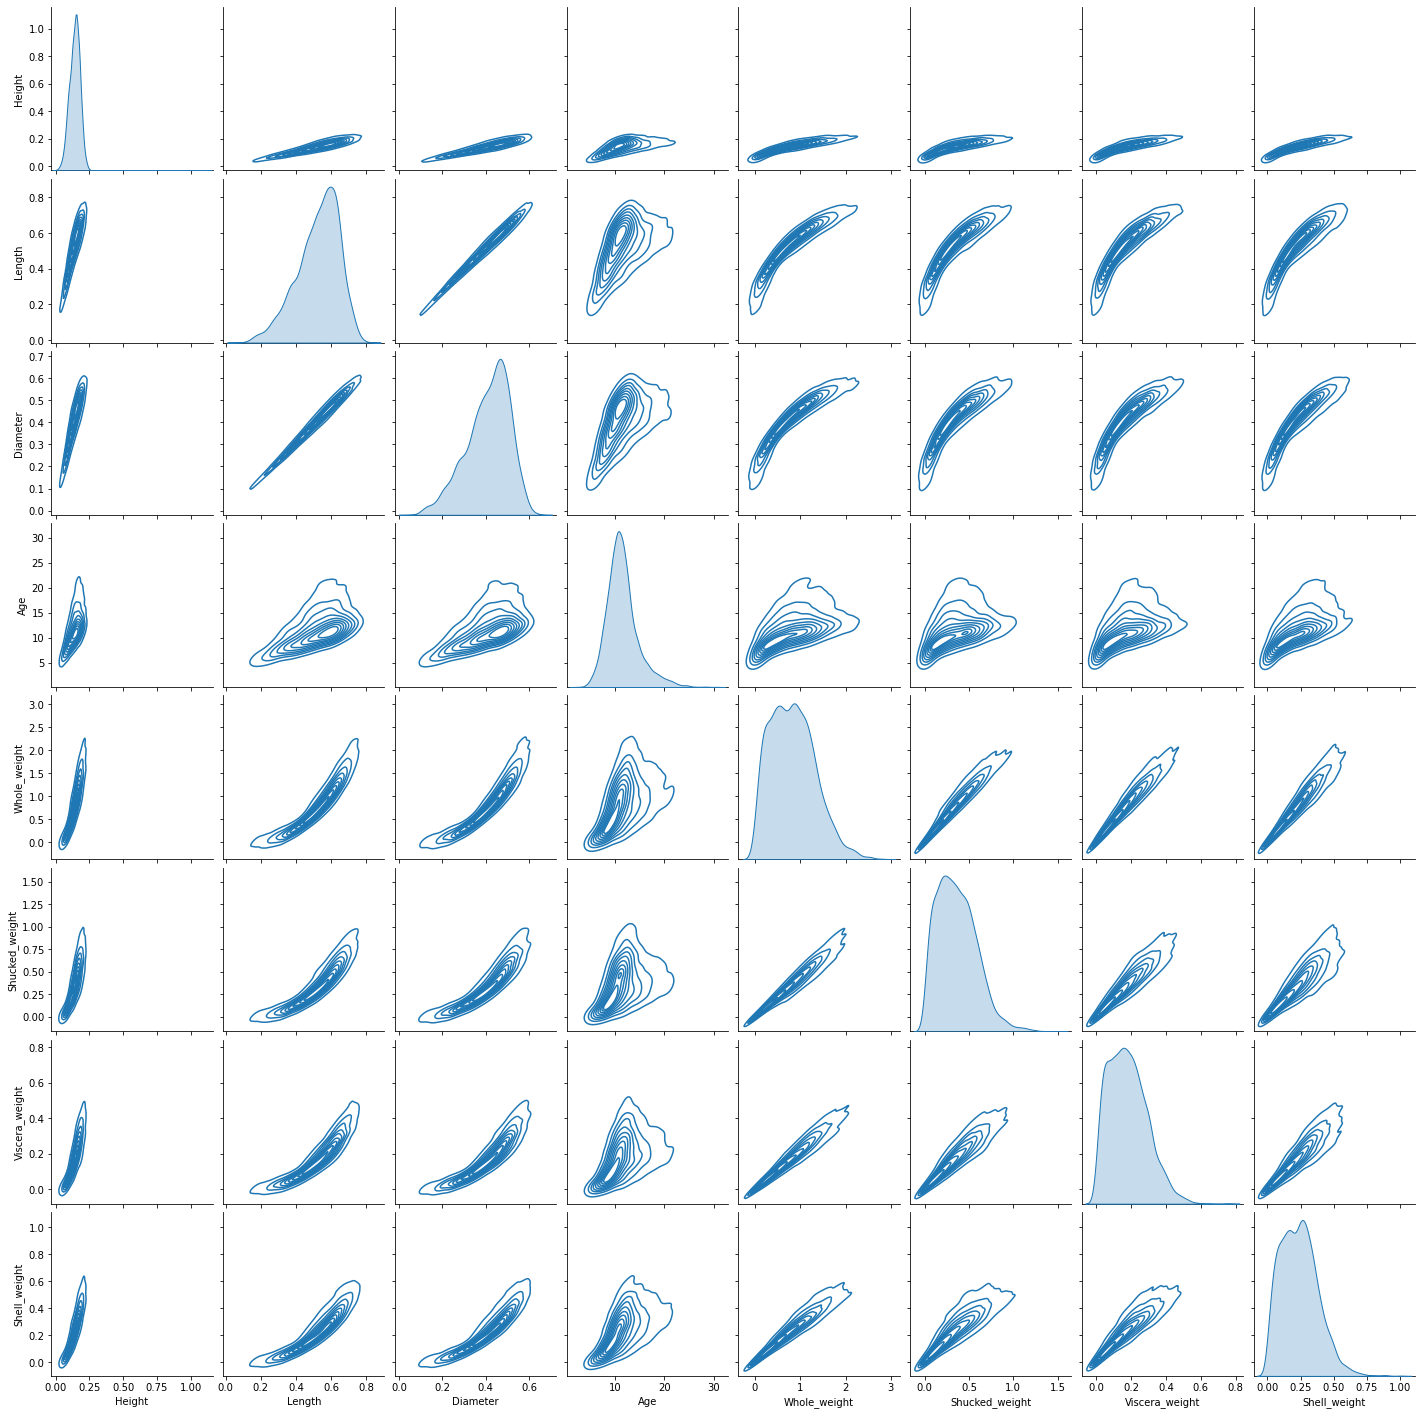

4. Perform descriptive statistics on the dataset

In [ ]:
data.describe(include='all')

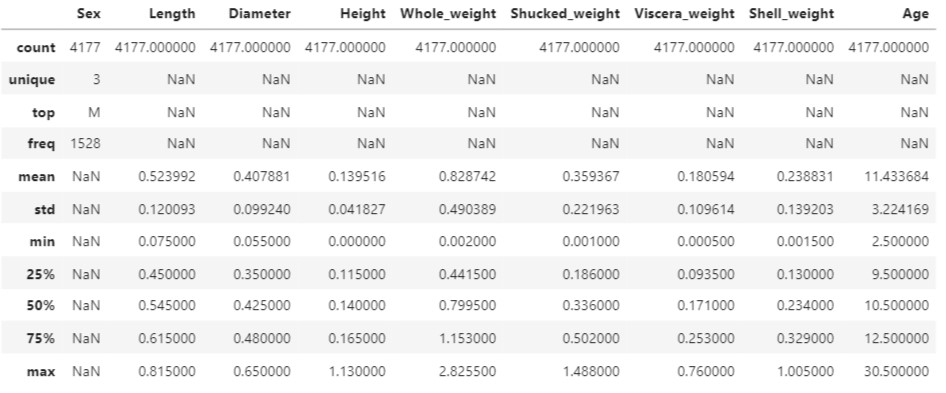

5. Check for Missing values and deal with them

In [ ]:
data.isnull().sum()

6. Find the outliers and replace them outliers

In [ ]:
outliers=data.quantile(q=(0.25,0.75))
outliers

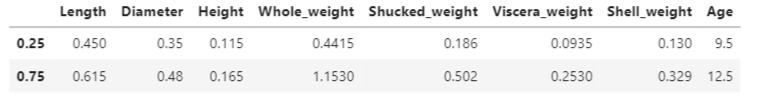

In [ ]:
a = data.Age.quantile(0.25)
b = data.Age.quantile(0.75)
c = b - a
lower_limit = a - 1.5 * c
data.median(numeric_only=True)

In [ ]:
data['Age'] = np.where(data['Age'] < lower_limit, 7, data['Age'])
sns.boxplot(x=data.Age,showfliers = False)

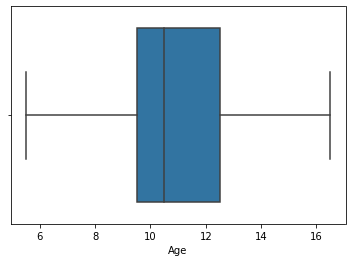

7. Check for Categorical columns and perform encoding

In [ ]:
data.head()

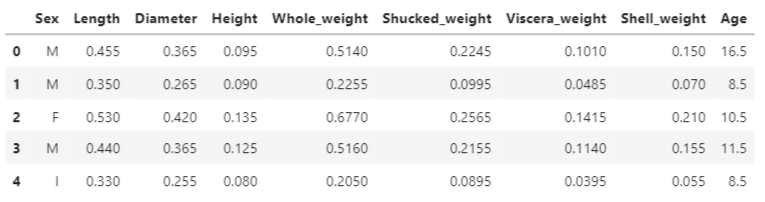

In [ ]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
data.Sex = lab.fit_transform(data.Sex)

data.head()

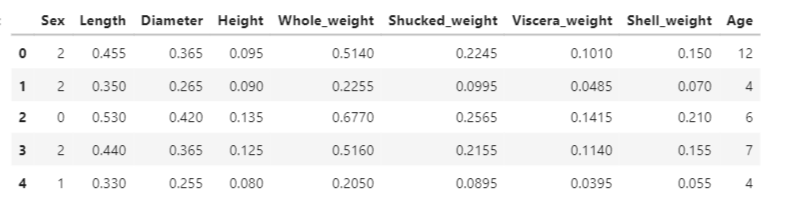

8. Split the data into dependent and independent variables

In [ ]:
y = data["Sex"]
y.head()

In [ ]:
x=data.drop(columns=["Sex"],axis=1)
x.head()

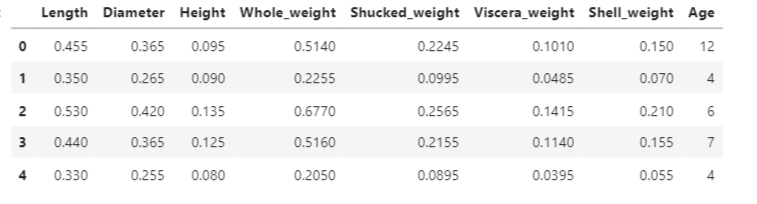

9. Scale the independent variables

In [ ]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

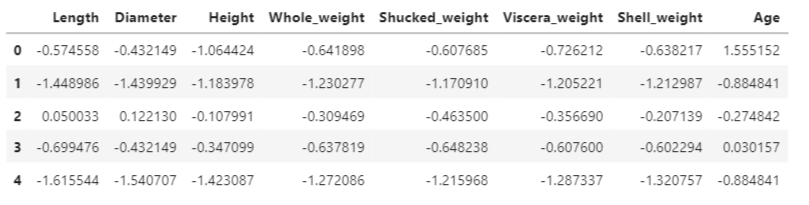

10. Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, y, test_size=0.2, random_state=0)

In [ ]:
X_Train.shape,X_Test.shape

In [ ]:
Y_Train.shape,Y_Test.shape

In [ ]:
X_Train.head()

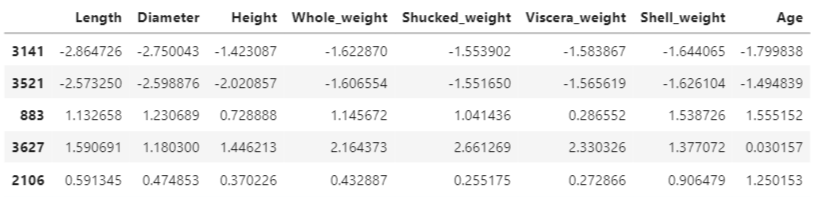

In [ ]:
X_Test.head()

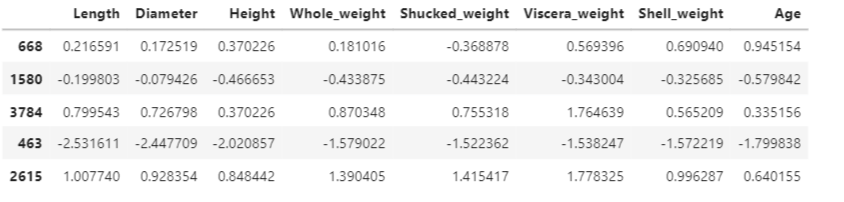

In [ ]:
Y_Train.head()

3141    1
3521    1
883     2
3627    2
2106    2
Name: Sex, dtype: int64

In [ ]:
Y_Test.head()

11. Build the Model

In [ ]:
rom sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [ ]:
model.fit(X_Train,Y_Train)

In [ ]:
y_predict = model.predict(X_Test)

In [ ]:
y_predict_train = model.predict(X_Train)

12. Train the Model

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
print('Training accuracy: ',accuracy_score(Y_Train,y_predict_train))

13.Test the Model

In [ ]:
print('Testing accuracy: ',accuracy_score(Y_Test,y_predict))

14. Measure the performance using Metrics

In [ ]:
pd.crosstab(Y_Test,y_predict)

In [ ]:
print(classification_report(Y_Test,y_predict))